In [2]:
#Author: Tirth Patel

import numpy as np


def twonn_dimension(data, return_xy=False):
    
    
    data = np.array(data)
    
    N = len(data)
    
    #mu = r2/r1 for each data point
    mu = []
    for i,x in enumerate(data):
        
        dist = np.sort(np.sqrt(np.sum((x-data)**2, axis=1)))
        r1, r2 = dist[dist>0][:2]

        mu.append((i+1,r2/r1))
        

    #permutation function
    sigma_i = dict(zip(range(1,len(mu)+1), np.array(sorted(mu, key=lambda x: x[1]))[:,0].astype(int)))

    mu = dict(mu)

    #cdf F(mu_{sigma(i)})
    F_i = {}
    for i in mu:
        F_i[sigma_i[i]] = i/N

    #fitting coordinates
    x = np.log([mu[i] for i in sorted(mu.keys())])
    y = np.array([1-F_i[i] for i in sorted(mu.keys())])

    #avoid having log(0)
    x = x[y>0]
    y = y[y>0]

    y = -1*np.log(y)

    #fit line through origin to get the dimension
    d = np.linalg.lstsq(np.vstack([x, np.zeros(len(x))]).T, y, rcond=None)[0][0]
        
    if return_xy:
        return d, x, y
    else: 
        return d

In [3]:
import pandas as pd
import numpy as np

In [4]:
ID_list = [['Dimensions', 'Intrinsic Dimensions (ID)', 'Rounded ID to nearest whole number']]
for i in range(1,21):
  data = np.random.uniform(0, 1, size=(1000, i))
  ID = twonn_dimension(data = data, return_xy=False)
  ID_list.append([i, ID, ID.round()])
ID_list

[['Dimensions',
  'Intrinsic Dimensions (ID)',
  'Rounded ID to nearest whole number'],
 [1, 1.0218349345575657, 1.0],
 [2, 2.146604142384749, 2.0],
 [3, 2.848479818601741, 3.0],
 [4, 3.8657569005261627, 4.0],
 [5, 4.439289823739166, 4.0],
 [6, 5.653583189810525, 6.0],
 [7, 6.123371931754041, 6.0],
 [8, 6.666303735708828, 7.0],
 [9, 8.124291637485756, 8.0],
 [10, 8.597197960723474, 9.0],
 [11, 9.529708001494665, 10.0],
 [12, 10.437859089522727, 10.0],
 [13, 11.392591980674903, 11.0],
 [14, 11.42985723367334, 11.0],
 [15, 11.546161024429724, 12.0],
 [16, 12.864929437221045, 13.0],
 [17, 13.97657986588709, 14.0],
 [18, 14.48754354222652, 14.0],
 [19, 15.66751515052525, 16.0],
 [20, 14.929940044355963, 15.0]]

In [5]:
out = pd.DataFrame(ID_list)
out

,0,1,2
0,Dimensions,Intrinsic Dimensions (ID),Rounded ID to nearest whole number
1,1,1.02183,1
2,2,2.1466,2
3,3,2.84848,3
4,4,3.86576,4
5,5,4.43929,4
6,6,5.65358,6
7,7,6.12337,6
8,8,6.6663,7
9,9,8.12429,8


In [6]:
data = np.random.uniform(0, 1, size=(100, 10))
print(np.array(data))
pd.DataFrame(data)

[[5.98095989e-01 1.88967158e-01 6.62546329e-01 6.32330642e-01
  9.73671535e-01 6.57638582e-01 6.99866757e-01 3.12021094e-01
  7.39577316e-01 1.58234357e-01]
 [3.02395146e-01 5.74716371e-02 7.21788219e-01 1.61649188e-01
  4.68998792e-01 7.61500441e-01 6.97594419e-01 1.20103920e-01
  3.06617041e-01 6.43370914e-01]
 [8.33185579e-01 6.00327817e-01 8.96913481e-01 3.02064011e-01
  3.81986841e-01 9.22947597e-01 9.76947155e-03 8.42091583e-01
  2.72556103e-02 9.49434166e-01]
 [5.63661081e-01 6.77978563e-01 3.86449673e-02 4.93456262e-01
  7.68804958e-01 4.80719086e-01 8.13380064e-01 7.96697099e-01
  3.42589256e-02 6.85290302e-01]
 [5.25280983e-01 9.42748100e-01 5.61451935e-01 1.95568310e-01
  4.89709800e-01 8.28929360e-01 4.18786140e-01 5.72779620e-01
  4.44248799e-01 1.54910835e-01]
 [2.28876502e-01 3.46205477e-01 8.99731082e-01 3.28581667e-01
  3.96211460e-01 7.11192942e-01 1.64183677e-01 1.61473077e-01
  3.96857865e-01 9.13680974e-02]
 [2.22012174e-01 3.66143952e-02 7.09528444e-01 6.92028837e

,0,1,2,3,4,5,6,7,8,9
0,0.598096,0.188967,0.662546,0.632331,0.973672,0.657639,0.699867,0.312021,0.739577,0.158234
1,0.302395,0.057472,0.721788,0.161649,0.468999,0.761500,0.697594,0.120104,0.306617,0.643371
2,0.833186,0.600328,0.896913,0.302064,0.381987,0.922948,0.009769,0.842092,0.027256,0.949434
3,0.563661,0.677979,0.038645,0.493456,0.768805,0.480719,0.813380,0.796697,0.034259,0.685290
4,0.525281,0.942748,0.561452,0.195568,0.489710,0.828929,0.418786,0.572780,0.444249,0.154911
...,...,...,...,...,...,...,...,...,...,...
95,0.867034,0.789033,0.207895,0.775886,0.260144,0.585105,0.307535,0.402664,0.059825,0.322464
96,0.117723,0.625105,0.404047,0.136746,0.933857,0.434467,0.997601,0.964031,0.634667,0.525610
97,0.986045,0.575837,0.974076,0.223196,0.410080,0.843232,0.618772,0.597591,0.727296,0.388590
98,0.446730,0.590874,0.842978,0.009913,0.275020,0.038836,0.713359,0.322610,0.426611,0.645164


In [7]:
ID = twonn_dimension(data = data, return_xy=False)
ID

7.265571581283508

In [8]:
import tensorflow

In [9]:
(trainval_x, trainval_y), (test_x, test_y) = tensorflow.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [10]:
trainval_x = np.float32(trainval_x)
trainval_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
trainval_y = np.float32(trainval_y)
trainval_y

array([5., 0., 4., ..., 5., 6., 8.], dtype=float32)

In [12]:
test_x = np.float32(test_x)
test_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [13]:
test_y = np.float32(test_y)
test_y

array([7., 2., 1., ..., 4., 5., 6.], dtype=float32)

In [14]:
trainval_x.shape

(60000, 28, 28)

In [15]:
trainval_x = trainval_x.reshape(-1, 28*28)
trainval_x.shape

(60000, 784)

In [16]:
test_x = test_x.reshape(-1, 28*28)
test_x.shape

(10000, 784)

In [17]:
out = pd.DataFrame(trainval_x)
out

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
num_1, num_2 = [], []
for i in range(len(trainval_y)):
  if trainval_y[i] == 1:
    num_1.append(trainval_x[i])
  if trainval_y[i] == 2:
    num_2.append(trainval_x[i])

In [20]:
pd.DataFrame(num_1[:1000])

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
pd.DataFrame(num_2[:1000])

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
ind_dim_1 = twonn_dimension(num_1[:1000])
ind_dim_1

11.56985416485127

In [23]:
ind_dim_2 = twonn_dimension(num_2[:1000])
ind_dim_2

14.004677277891453

In [24]:
import matplotlib.pyplot as plt

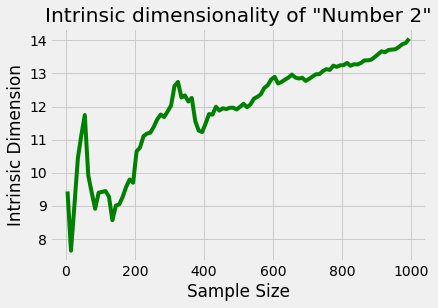

In [34]:
ind_dim_list_2 = []
for i in range(5,1000, 10):
  temp = twonn_dimension(num_2[:i])
  ind_dim_list_2.append(temp)
plt.plot(range(5,1000,10), ind_dim_list_2, 'g-')
plt.xlabel('Sample Size')
plt.ylabel('Intrinsic Dimension')
plt.title('Intrinsic dimensionality of "Number 2"')
plt.style.use('fivethirtyeight')
plt.show()

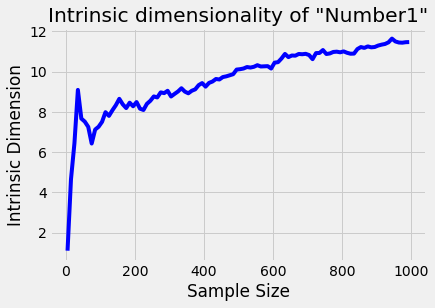

In [39]:
ind_dim_list_1 = []
for i in range(5,1000, 10):
  temp = twonn_dimension(num_1[:i])
  ind_dim_list_1.append(temp)
plt.plot(range(5,1000,10), ind_dim_list_1, 'b-')
plt.xlabel('Sample Size')
plt.ylabel('Intrinsic Dimension')
plt.title('Intrinsic dimensionality of "Number1"')
plt.style.use('fivethirtyeight')
plt.show()

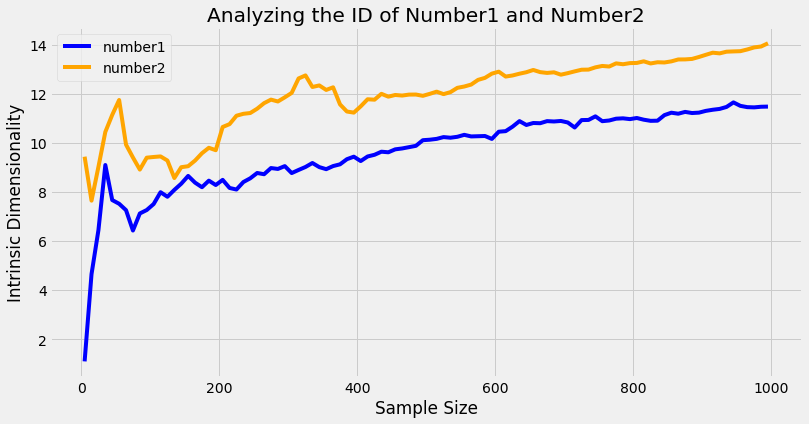

In [41]:
plt.figure(figsize=(12,6))
plt.title('Analyzing the ID of Number1 and Number2')
plt.xlabel('Sample Size')
plt.ylabel('Intrinsic Dimensionality')
plt.plot(range(5,1000,10),ind_dim_list_1, color='blue', label= 'number1')
plt.plot(range(5,1000,10),ind_dim_list_2, color='orange', label= 'number2')
plt.legend()
plt.show()